In [51]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

%matplotlib inline

In [57]:
TRAIN_DATA_PATH = 'ynet_additional_files/data/SDD/train_trajnet.pkl'
df_train = pd.read_pickle(TRAIN_DATA_PATH)
df_train.head()

,frame,trackId,x,y,sceneId,metaId
0,0,100,757.0,918.5,bookstore_0,0
1,12,100,765.0,918.5,bookstore_0,0
2,24,100,773.0,918.5,bookstore_0,0
3,36,100,780.5,918.5,bookstore_0,0
4,48,100,788.5,919.5,bookstore_0,0


In [28]:
print(df_train.sceneId.unique())
df_scene = df_train[df_train.sceneId == 'bookstore_0']
len(df_scene.metaId.unique())

['bookstore_0' 'bookstore_1' 'bookstore_2' 'bookstore_3' 'coupa_3'
 'deathCircle_0' 'deathCircle_1' 'deathCircle_2' 'deathCircle_3'
 'deathCircle_4' 'gates_0' 'gates_1' 'gates_3' 'gates_4' 'gates_5'
 'gates_6' 'gates_7' 'gates_8' 'hyang_4' 'hyang_5' 'hyang_6' 'hyang_7'
 'hyang_9' 'nexus_0' 'nexus_1' 'nexus_3' 'nexus_4' 'nexus_7' 'nexus_8'
 'nexus_9']


805

In [35]:
trajectory = df_scene[['x', 'y']].to_numpy().astype('float32').reshape(-1, 20, 2)
trajectory.shape

(805, 20, 2)

(1088, 1424, 3)


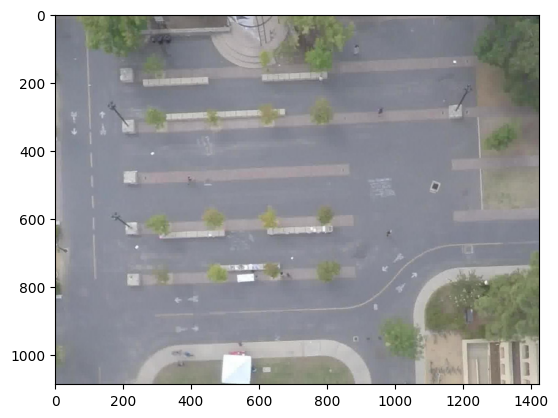

In [36]:
img_path = 'ynet_additional_files/data/SDD/train/bookstore_0/reference.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

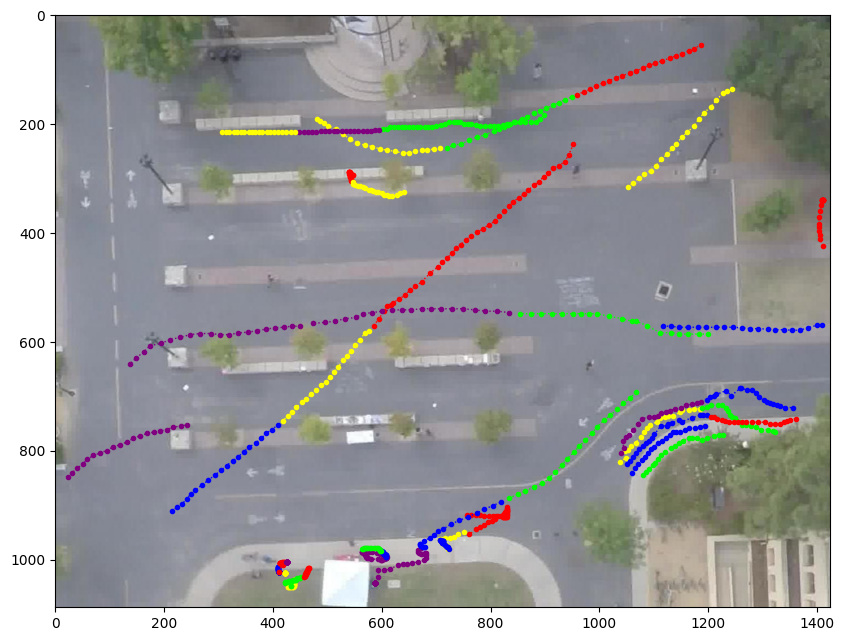

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

colors_rgb = [
        (1.0, 0.0, 0.0),  # Red
        (0.0, 1.0, 0.0),  # Green
        (0.0, 0.0, 1.0),  # Blue
        (1.0, 1.0, 0.0),  # Yellow
        (0.5, 0.0, 0.5)   # Purple
    ]

# 为每个轨迹绘制线条，并使用不同的颜色
for i, traj in enumerate(trajectory):
    if i <= 50:
        x, y = zip(*traj)  # 分离 x 和 y 坐标
        ax.plot(x, y, marker='.', linestyle=':', color=colors_rgb[i % len(colors_rgb)], linewidth=1)

plt.show()